===============================没有加入新变量时===============================
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     4.878
Date:                Mon, 17 Sep 2018   Prob (F-statistic):             0.0397
Time:                        18:13:53   Log-Likelihood:                -29.583
No. Observations:                  20   AIC:                             61.17
Df Residuals:                      19   BIC:                             62.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

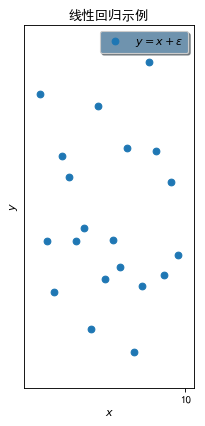

In [14]:
# -*- coding: UTF-8 -*-
"""
此脚本用于随机生成线性回归模型的训练数据
添加新变量
Review:180917
"""
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures 
import statsmodels.api as sm 
from warnings import filterwarnings
filterwarnings('ignore')


def readData(path):
    data = pd.read_csv(path)
    return data

def generate_data():
    np.random.seed(5320)
    x = np.array(range(0,20))/2
    error = np.round(np.random.randn(20),2)
    y = 0.05 * x + error # 
    z = np.zeros(20) + 1 
    return pd.DataFrame({'x':x,'y':y,'z':z})

def visualize_data(data):
    plt.rcParams['font.sans-serif'] = ['SimHei']
    fig = plt.figure(figsize=(6,6),dpi=80)
    ax = fig.add_subplot(121)
    ax.set_title('%s' % '线性回归示例')
    ax.set_xlabel('$x$') # 实际显示 x
    ax.set_xticks(range(10,31,5)) # x轴的刻度
    ax.set_ylabel('$y$') # 实际显示 y
    ax.set_yticks(range(10,31,5)) # y轴的刻度
    ax.scatter(data.x,data.y,label ='$y = x + \epsilon$') # 实际显示 y=x+ε
    ax2 = fig.add_subplot(121)
    '''
    for i in range(2):
        ax[i].set_title('%s' % '线性回归示例')
        ax[i].set_xlabel('$x$') # 实际显示 x
        ax[i].set_xticks(range(10,31,5)) # x轴的刻度
        ax[i].set_ylabel('$y$') # 实际显示 y
        ax[i].set_yticks(range(10,31,5)) # y轴的刻度
        ax[i].scatter(data.x,data.y,label ='$y = x + \epsilon$') # 实际显示 y=x+ε
    '''
    legend = plt.legend(shadow=True) # 边框立体阴影
    legend.get_frame().set_facecolor('#6F93AE') # 边框填充色 因为上面有阴影

def wrong_coef(data):
    features = ['x','z']
    labels = ['y']
    xx = data[features]
    yy = data[labels]
    model = sm.OLS(yy,xx['x']) # 最小二乘
    res = model.fit()
    print('没有加入新变量时'.center(70,'='))
    print(res.summary())
    model_1 = sm.OLS(yy,xx) # 加入变量z 
    res_1 = model_1.fit()
    print('加入新变量后'.center(72,'='))
    print(res_1.summary()) # 报告需要建设检验的知识

if __name__ == "__main__":
    data = generate_data()
    #data=readData('simple_example.csv')
    featurizer=PolynomialFeatures(degree=5)
    wrong_coef(data)
    visualize_data(data)

